In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

In [55]:
sales = pd.read_csv('Direct to Consumer.csv')

In [56]:
df = pd.DataFrame(data=sales)

In [57]:
df

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Region,watershed_code,Watershed,Commodity,Domain,Domain Category,sales_value,sales_value_prc,sales_in_dollars,sales_dollar_prc
0,CENSUS,2015,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,0,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,"114,801",3.1,"3,026,677,024",10.4
1,CENSUS,2015,YEAR,NaN,REGION : MULTI-STATE,NaN,NaN,NaN,NaN,NaN,...,REGION 1 (AZ CA CO HI NV NM UT),0,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,"12,492",9.8,"554,452,559",29.9
2,CENSUS,2015,YEAR,NaN,REGION : MULTI-STATE,NaN,NaN,NaN,NaN,NaN,...,REGION 2 (CT DE ME MD MA NH NJ NY PA RI VT),0,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,"25,46",7.3,"1,015,778,612",12.3
3,CENSUS,2015,YEAR,NaN,REGION : MULTI-STATE,NaN,NaN,NaN,NaN,NaN,...,REGION 3 (AK ID MT OR WA WY),0,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,"11,41",14.2,"157,371,624",10.6
4,CENSUS,2015,YEAR,NaN,REGION : MULTI-STATE,NaN,NaN,NaN,NaN,NaN,...,REGION 4 (IA KS MN MO NE ND SD),0,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,"13,443",17.4,"244,128,993",29.9
5,CENSUS,2015,YEAR,NaN,REGION : MULTI-STATE,NaN,NaN,NaN,NaN,NaN,...,REGION 5 (AL AR LA MS OK TX),0,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,"8,711",21.5,"122,090,511",16.7
6,CENSUS,2015,YEAR,NaN,REGION : MULTI-STATE,NaN,NaN,NaN,NaN,NaN,...,REGION 6 (FL GA KY NC SC TN VA WV),0,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,"21,303",7.5,"480,532,575",17.8
7,CENSUS,2015,YEAR,NaN,REGION : MULTI-STATE,NaN,NaN,NaN,NaN,NaN,...,REGION 7 (IL IN MI OH WI),0,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,"21,982",10.2,"452,322,150",14.0
8,CENSUS,2015,YEAR,NaN,STATE,CALIFORNIA,6.0,NaN,NaN,NaN,...,NaN,0,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,"6,015",23.1,"467,492,978",35.4
9,CENSUS,2015,YEAR,NaN,STATE,COLORADO,8.0,NaN,NaN,NaN,...,NaN,0,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,"1,504",21.2,"26,705,240",37.7


In [58]:
#Dropping all the regions to work with states only so that there will be no duplicates.
df = df[df.index>7]

In [59]:
df

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Region,watershed_code,Watershed,Commodity,Domain,Domain Category,sales_value,sales_value_prc,sales_in_dollars,sales_dollar_prc
8,CENSUS,2015,YEAR,NaN,STATE,CALIFORNIA,6.0,NaN,NaN,NaN,...,NaN,0,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,"6,015",23.1,"467,492,978",35.4
9,CENSUS,2015,YEAR,NaN,STATE,COLORADO,8.0,NaN,NaN,NaN,...,NaN,0,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,"1,504",21.2,"26,705,240",37.7
10,CENSUS,2015,YEAR,NaN,STATE,CONNECTICUT,9.0,NaN,NaN,NaN,...,NaN,0,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,"1,131",8.9,"61,940,381",12.4
11,CENSUS,2015,YEAR,NaN,STATE,FLORIDA,12.0,NaN,NaN,NaN,...,NaN,0,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,"1,734",35.8,"21,591,347",30.1
12,CENSUS,2015,YEAR,NaN,STATE,HAWAII,15.0,NaN,NaN,NaN,...,NaN,0,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,"1,234",28.5,"22,811,290",16.2
13,CENSUS,2015,YEAR,NaN,STATE,ILLINOIS,17.0,NaN,NaN,NaN,...,NaN,0,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,"3,71",18.3,"73,971,762",21.0
14,CENSUS,2015,YEAR,NaN,STATE,INDIANA,18.0,NaN,NaN,NaN,...,NaN,0,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,"3,645",24.6,"66,898,486",16.7
15,CENSUS,2015,YEAR,NaN,STATE,IOWA,19.0,NaN,NaN,NaN,...,NaN,0,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,"2,086",19.1,"51,195,111",60.7
16,CENSUS,2015,YEAR,NaN,STATE,KENTUCKY,21.0,NaN,NaN,NaN,...,NaN,0,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,"2,574",19.5,"35,035,819",29.8
17,CENSUS,2015,YEAR,NaN,STATE,MAINE,23.0,NaN,NaN,NaN,...,NaN,0,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,"1,715",12.4,"54,580,888",18.2


Text(0.5, 1.0, 'Total Sales')

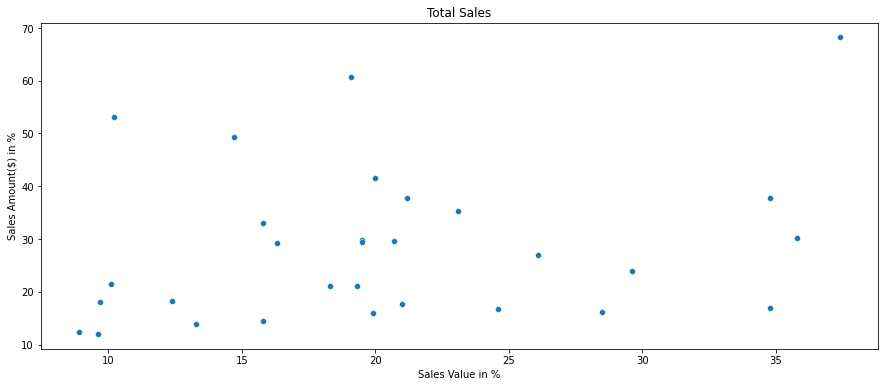

In [60]:
#Checking For Outliers In The Dataset
plt.figure(figsize=(15,6))
sns.scatterplot(x='sales_value_prc', y='sales_dollar_prc', data=df)
plt.xlabel("Sales Value in %")
plt.ylabel("Sales Amount($) in %")
plt.title("Total Sales")

In [61]:
#Dropping The Outlier
df = df[df['sales_dollar_prc']<=65]

Text(0.5, 1.0, 'Total Sales')

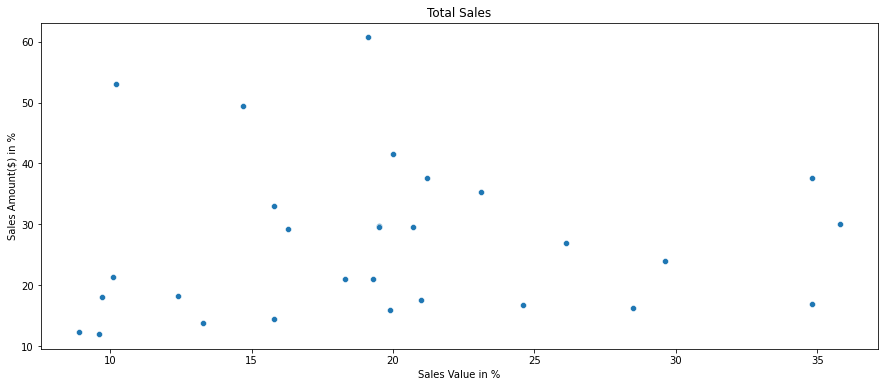

In [62]:
#Checking If The outlier Was Dropped Successfully
plt.figure(figsize=(15,6))
sns.scatterplot(x='sales_value_prc', y='sales_dollar_prc', data=df)
plt.xlabel("Sales Value in %")
plt.ylabel("Sales Amount($) in %")
plt.title("Total Sales")

<AxesSubplot:xlabel='sales_dollar_prc', ylabel='Count'>

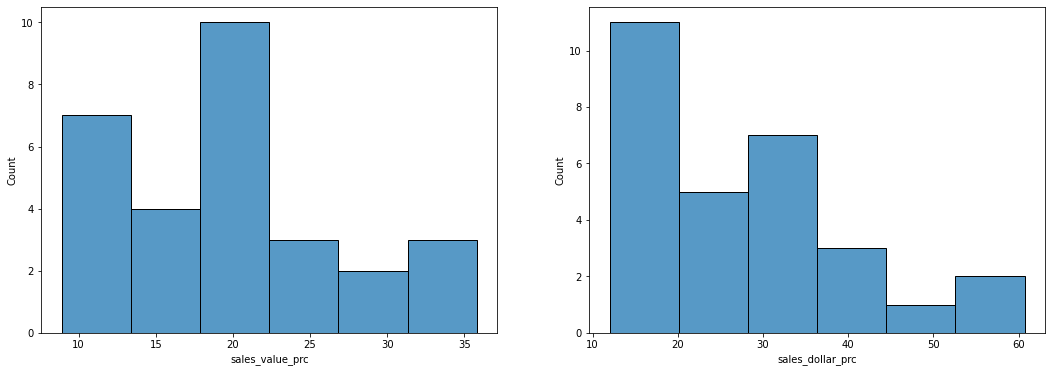

In [63]:
#Checking The Skewness Of The Dataset
fig, axes = plt.subplots(ncols=2, figsize=(18,6))
sns.histplot(df.sales_value_prc, ax=axes[0])
sns.histplot(df.sales_dollar_prc, ax=axes[1])

In [68]:
df.sales_value_prc.mean()

19.744827586206902

In [69]:
df.sales_dollar_prc.mean()

27.010344827586206

In [66]:
#Dropping the uneccesary numerical values in order to work with percentages only
df = df.drop(['Year', 'State ANSI', 'watershed_code', 'sales_value', 'sales_in_dollars', 'Week Ending', 'Ag District', 'Ag District Code', 'County', 'County ANSI', 'Zip Code', 'Watershed'], axis=1)

In [67]:
#Checking if values were successfully dropped
df

,Program,Period,Geo Level,State,Region,Commodity,Domain,Domain Category,sales_value_prc,sales_dollar_prc
8,CENSUS,YEAR,STATE,CALIFORNIA,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,23.1,35.4
9,CENSUS,YEAR,STATE,COLORADO,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,21.2,37.7
10,CENSUS,YEAR,STATE,CONNECTICUT,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,8.9,12.4
11,CENSUS,YEAR,STATE,FLORIDA,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,35.8,30.1
12,CENSUS,YEAR,STATE,HAWAII,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,28.5,16.2
13,CENSUS,YEAR,STATE,ILLINOIS,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,18.3,21.0
14,CENSUS,YEAR,STATE,INDIANA,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,24.6,16.7
15,CENSUS,YEAR,STATE,IOWA,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,19.1,60.7
16,CENSUS,YEAR,STATE,KENTUCKY,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,19.5,29.8
17,CENSUS,YEAR,STATE,MAINE,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,12.4,18.2


In [70]:
# Check the skew of all numerical features
skewed_feats = df.select_dtypes(['int','float']).apply(lambda x: skew(x)).sort_values(ascending=False).to_frame(name='skewness')
skewed_feats.sort_values(by='skewness', ascending=False)

,skewness
sales_dollar_prc,0.993377
sales_value_prc,0.564819


# Checking the outlier state

In [74]:
#Printing the outlier
sales = pd.read_csv('Direct to Consumer.csv')
sales[sales['sales_dollar_prc']>=65]

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Region,watershed_code,Watershed,Commodity,Domain,Domain Category,sales_value,sales_value_prc,sales_in_dollars,sales_dollar_prc
22,CENSUS,2015,YEAR,NaN,STATE,MISSOURI,29.0,NaN,NaN,NaN,...,NaN,0,NaN,COMMODITY TOTALS,TOTAL,NOT SPECIFIED,"4,398",37.4,"108,360,654",68.2
